#### IMPORTING LIBRARIES

In [49]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### IMPORTING DATA AND MAKING CONNECTION

In [3]:
conn=sql.connect('sales_data.db')

In [4]:
def execute_query(q):
    return pd.read_sql_query(q,conn)

#### GENERAL OVERVIEW OF THE FILE

In [6]:
execute_query("select * from sqlite_master where type='table'")

,type,name,tbl_name,rootpage,sql
0,table,customers,customers,2,CREATE TABLE customers (\n customer_id INTE...
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,products,products,4,CREATE TABLE products (\n product_id INTEGE...
3,table,sales,sales,5,CREATE TABLE sales (\n sale_id INTEGER PRIM...


- Our file `Sales.db` constains 4 tables customers ,sqlite_sequence,products and sales .

#### CHECKING BASIC TABLE INFO

##### CUSTOMER TABLE

In [7]:
execute_query('select * from customers')

,customer_id,name,email,phone_number,city
0,1,Keith White,saundersdanielle@gmail.com,(433)275-7092,Amberhaven
1,2,Curtis Black,dylanstone@taylor.com,001-322-273-7186x52593,New Amyland
2,3,Anthony Walsh,ronnie33@smith.com,(010)948-6067x5822,Bellville
3,4,Christopher Huerta,annathompson@gmail.com,(259)616-9273,Lake Joshuaton
4,5,Kevin Thomas,victordonovan@campbell.com,+1-264-421-4723x1743,East Kristiburgh
...,...,...,...,...,...
495,496,Mrs. Brooke Cannon DDS,felicia86@gmail.com,672-643-6950,North Jillburgh
496,497,Carol Brewer,schwartzana@hotmail.com,001-170-163-0432x83978,Briggshaven
497,498,Anthony Burns DVM,ggardner@mclaughlin.com,+1-965-690-3632x9614,New Don
498,499,Dawn Allen,jennifer46@yahoo.com,234-444-8428x93773,Port Michelleborough


In [12]:
execute_query('select * from customers where customer_id = 1')

,customer_id,name,email,phone_number,city
0,1,Keith White,saundersdanielle@gmail.com,(433)275-7092,Amberhaven


- Customer Table contains 5 columns and 500 rows
- Columns name: 
    - Customer ID : Unique identifier for each customer
    - name: Name of the customer
    - email:email of customer
    - phone number: Phone number of customer
    - city : City of customer


##### sqlite_sequence Table

In [8]:
execute_query('select * from sqlite_sequence')

,name,seq
0,customers,500
1,products,10
2,sales,1000


- It seems that sqlite_sequence table contains basic information about the all the tables in the database. This Table has no involvment in our EDA

#### PRODUCT TABLE

In [9]:
execute_query('select * from products')

,product_id,product_name,category,price
0,1,Laptop,Electronics,1000.0
1,2,Phone,Electronics,500.0
2,3,Tablet,Electronics,300.0
3,4,Shirt,Apparel,20.0
4,5,Jeans,Apparel,40.0
5,6,Shoes,Apparel,60.0
6,7,Watch,Accessories,150.0
7,8,Bag,Accessories,80.0
8,9,Headphones,Electronics,100.0
9,10,Camera,Electronics,400.0


In [14]:
execute_query('select * from products where product_id=1')

,product_id,product_name,category,price
0,1,Laptop,Electronics,1000.0


- Product table constains information about the products having 4 columns and 9 rows
- Columns names
    - Product ID : Unique Identifier
    - Product Name : Name of the product
    - Price : Price of the product
    - Category from which products belongs to

#### SALES TABLE

In [10]:
execute_query('select * from  Sales')

,sale_id,customer_id,product_id,sale_date,quantity,total_sale
0,1,369,1,2022-08-31,5,5000.0
1,2,333,3,2023-03-15,2,600.0
2,3,298,7,2023-07-29,3,450.0
3,4,281,8,2020-03-23,1,80.0
4,5,374,8,2024-04-03,3,240.0
...,...,...,...,...,...,...
995,996,27,9,2022-08-26,2,200.0
996,997,61,6,2023-09-04,1,60.0
997,998,161,2,2025-05-17,5,2500.0
998,999,76,7,2020-03-20,2,300.0


In [15]:
execute_query('select * from sales where sale_id=1')

,sale_id,customer_id,product_id,sale_date,quantity,total_sale
0,1,369,1,2022-08-31,5,5000.0


- Sales table contains information about sales having 6 columns and 1000 rows.
- Columns names are:
    - Sales ID: Unique identifier for each sale.
    - Customer ID :Foreign key referencing the Customers table.
    - Product ID: Foreign key referencing the Products table.
    - Sales Date: Date of Sales.
    - Quantity : Quantity of Sales 
    - Total_sale :tOTAL Sale

### TASKS

##### TASK1

##### What is the total sales revenue for each product category?

In [18]:
query='''
SELECT 
    p.category,
    SUM(s.total_sale) AS total_sales_revenue
FROM 
    Sales s
INNER JOIN 
    Products p ON s.product_id = p.product_id
GROUP BY 
    p.category;
'''
total_sales_revenue=execute_query(query)

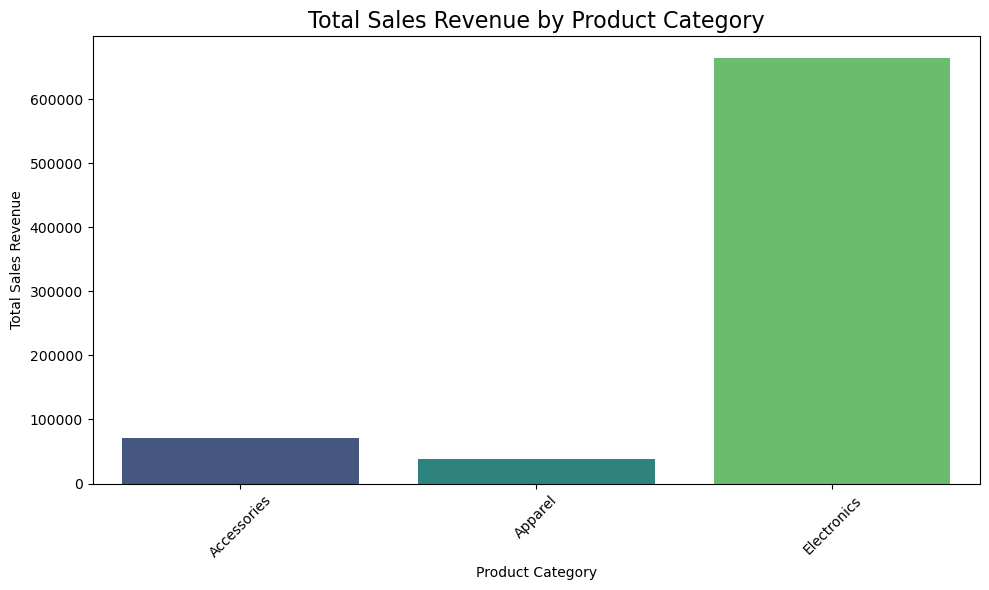

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=total_sales_revenue, x="category", y="total_sales_revenue", palette="viridis")
plt.title("Total Sales Revenue by Product Category", fontsize=16)
plt.xlabel("Product Category")
plt.ylabel("Total Sales Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
total_sales_revenue

,category,total_sales_revenue
0,Accessories,71100.0
1,Apparel,38680.0
2,Electronics,665000.0


### OBSERVATION
---
- Electronics is the top-performing category with a total sales revenue of 665,000, significantly outperforming all other categories.
- Accessories comes in second with 71,100, which is nearly 90% lower than Electronics.
- Apparel has the lowest revenue at 38,680, indicating it may need improved marketing or sales strategy.
---
There is a strong concentration of sales in the Electronics category, suggesting it's the primary driver of business revenue.


#### TASK 2

#### Which are the top 10 best-selling products?

In [27]:
query=''' 
SELECT 
    p.product_name,
    SUM(s.quantity) AS total_quantity_sold
FROM 
    Sales s
JOIN 
    Products p ON s.product_id = p.product_id
GROUP BY 
    p.product_name
ORDER BY 
    total_quantity_sold DESC
LIMIT 10;

'''
top_10_products=execute_query(query)

In [31]:
top_10_products

,product_name,total_quantity_sold
0,Shirt,349
1,Watch,330
2,Phone,319
3,Shoes,317
4,Jeans,317
5,Headphones,294
6,Laptop,286
7,Camera,272
8,Tablet,271
9,Bag,270


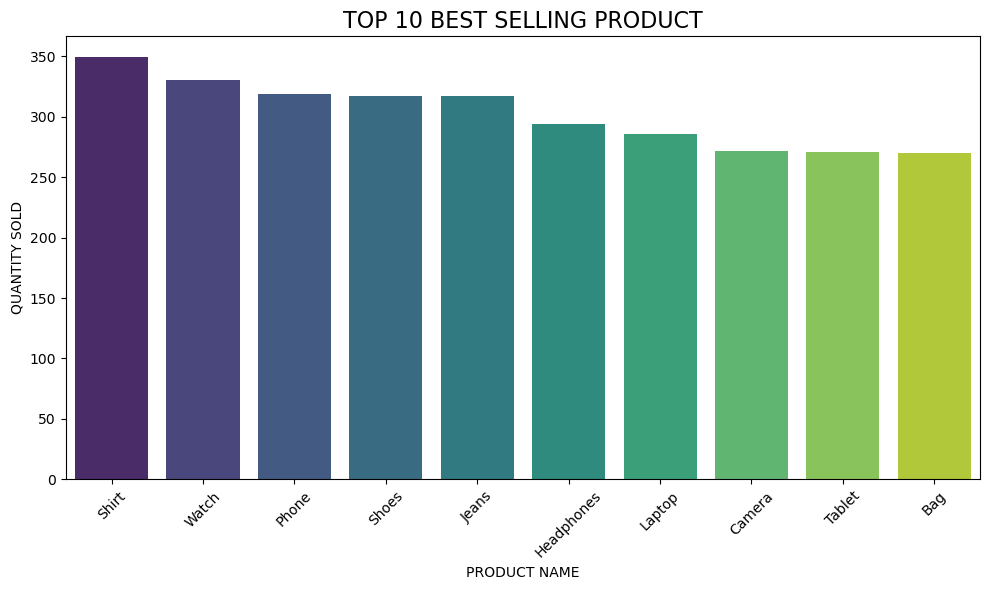

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_products, x="product_name", y="total_quantity_sold", palette="viridis")
plt.title("TOP 10 BEST SELLING PRODUCT", fontsize=16)
plt.xlabel("PRODUCT NAME")
plt.ylabel("QUANTITY SOLD")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### OBSERVATION
---
- Shirt is the best-selling product with 349 units sold, slightly ahead of Watch (330 units).
- Apparel items (Shirt, Jeans, Shoes) are doing well, making up 3 of the top 5.
- Phones and Electronics (Phone, Headphones, Laptop, Camera, Tablet) dominate the mid-tier range — suggesting consistent demand.
- Sales distribution is tight: Products ranked 3 to 10 are all within a ~50 unit range, showing a relatively balanced sales spread beyond the top item.
- The small gap between Shoes and Jeans (both at 317) highlights equal demand for these categories.
---

#### TASK 3

#### What is the average sale quantity and average total sale value per customer city?

In [35]:
query='''
SELECT
    c.city,
    AVG(s.quantity) AS average_sale_quantity,
    AVG(s.total_sale) AS average_total_sale_value
FROM
    Sales AS s
JOIN
    Customers AS c ON s.customer_id = c.customer_id
GROUP BY
    c.city
ORDER BY
    c.city;
'''
avgsales_customer=execute_query(query)

In [39]:
avgsales_customer

,city,average_sale_quantity,average_total_sale_value
0,Adambury,1.000000,400.000000
1,Aguirremouth,3.000000,100.000000
2,Alexberg,2.000000,200.000000
3,Alisonberg,2.333333,603.333333
4,Allenborough,2.000000,160.000000
...,...,...,...
428,Williamsstad,2.000000,120.000000
429,Wilsonborough,3.666667,926.666667
430,Woodfort,2.333333,1360.000000
431,Wrightbury,2.500000,770.000000


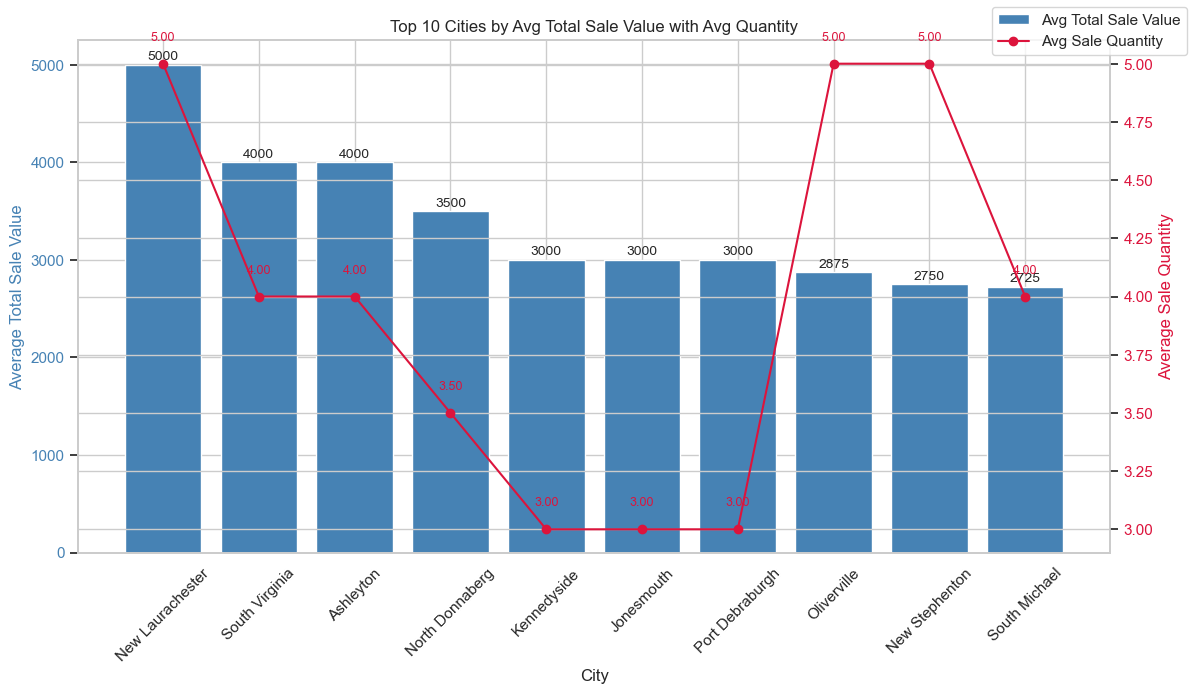

In [38]:
# Select top 10 cities by average total sale value
top10 = avgsales_customer.sort_values(by='average_total_sale_value', ascending=False).head(10)

# Set up figure
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot average total sale value
bars = ax1.bar(top10['city'], top10['average_total_sale_value'], color='steelblue', label='Avg Total Sale Value')
ax1.set_ylabel('Average Total Sale Value', color='steelblue')
ax1.set_xlabel('City')
ax1.tick_params(axis='y', labelcolor='steelblue')
plt.xticks(rotation=45)
plt.title('Top 10 Cities by Avg Total Sale Value with Avg Quantity')

# Annotate total sale value on bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 20, f'{yval:.0f}', ha='center', va='bottom', fontsize=10)

# Create second y-axis for average sale quantity
ax2 = ax1.twinx()
ax2.plot(top10['city'], top10['average_sale_quantity'], color='crimson', marker='o', label='Avg Sale Quantity')
ax2.set_ylabel('Average Sale Quantity', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Annotate line chart points
for i, val in enumerate(top10['average_sale_quantity']):
    ax2.text(i, val + 0.1, f'{val:.2f}', color='crimson', ha='center', fontsize=9)

# Add legends
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.show()

### OBSERVATION
---
- The top 10 cities with the highest average total sale value show a strong purchasing power, with values ranging from ₹1,360 to ₹926 per sale.
- Cities like Woodfort and Wilsonborough lead in average total sale value, suggesting high-value transactions per customer.
However, their average sale quantity remains relatively modest (around 2–4 units), indicating that customers are buying fewer but more expensive items.
- This pattern may point toward premium product preferences or higher pricing in these regions.
- Understanding these trends can help target high-revenue cities with strategic product offerings and promotions.
---

#### TASK 4

#### How have total sales revenue and quantity sold trended over time (annually)?

In [42]:
query= '''
SELECT 
    strftime('%Y', sale_date) AS year,
    SUM(quantity) AS total_quantity_sold,
    SUM(total_sale) AS total_sales_revenue
FROM 
    Sales
GROUP BY 
    year
ORDER BY 
    year;

'''
qunanity_sold=execute_query(query)

In [43]:
qunanity_sold

,year,total_quantity_sold,total_sales_revenue
0,2020,568,157000.0
1,2021,588,161510.0
2,2022,477,113940.0
3,2023,611,149370.0
4,2024,568,121830.0
5,2025,213,71130.0


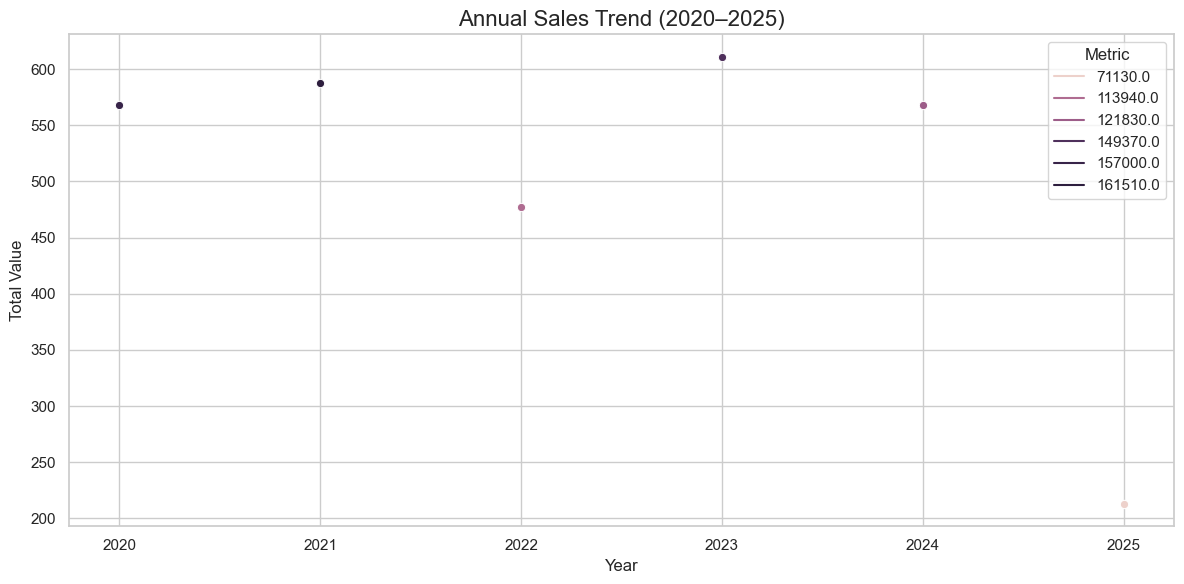

In [50]:
# Plot
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=qunanity_sold, x='year', y='total_quantity_sold', hue='total_sales_revenue', marker='o')

# Final touches
plt.title('Annual Sales Trend (2020–2025)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.xticks(qunanity_sold['year'])
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

#### OBSERVATION 
--- 
#### Annual sales revenue and quantity sold show fluctuations over the years, with a peak in both metrics around 2021 and 2023, indicating periods of higher demand. Recent years show a slight decline, suggesting potential changes in market conditions or sales strategies.
---

#### TASK 5

#### Who are the top 10 customers by total revenue generated?

In [58]:
query='''
SELECT 
    c.customer_id,
    c.name,
    SUM(s.total_sale) AS total_revenue
FROM 
    Sales s
JOIN 
    customers c ON s.customer_id = c.customer_id
GROUP BY 
    c.customer_id, c.name
ORDER BY 
    total_revenue DESC
LIMIT 10;
'''
topcustomers=execute_query(query)

In [59]:
topcustomers

,customer_id,name,total_revenue
0,290,Paula Kim,10700.0
1,339,Emily Fisher,9500.0
2,284,Maria Franco,9250.0
3,353,Brian Deleon,9020.0
4,60,Brian Cruz,8720.0
5,403,Amanda Moore,8650.0
6,325,Michelle Hull,8100.0
7,244,Paul Larson,7300.0
8,86,Michael Nielsen,7000.0
9,161,Allen Coleman,7000.0


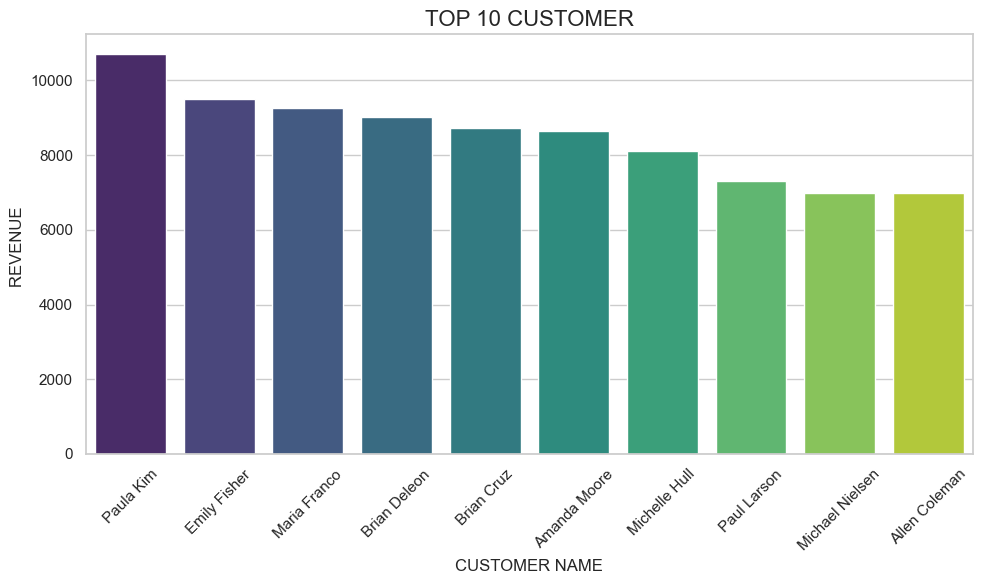

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(data=topcustomers, x="name", y="total_revenue", palette="viridis")
plt.title("TOP 10 CUSTOMER", fontsize=16)
plt.xlabel("CUSTOMER NAME")
plt.ylabel("REVENUE ")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### OBSERVATION
--- 
#### The top 10 customers contribute a significant portion of total revenue, indicating a strong reliance on key clients for sales performance.
--- 

#### TASK 6

####  What is the average price of products in each category?

In [62]:
query='''
SELECT 
    category,
    AVG(price) AS average_price
FROM 
    Products
GROUP BY 
    category;

'''
prod_cat=execute_query(query)

In [63]:
prod_cat

,category,average_price
0,Accessories,115.0
1,Apparel,40.0
2,Electronics,460.0


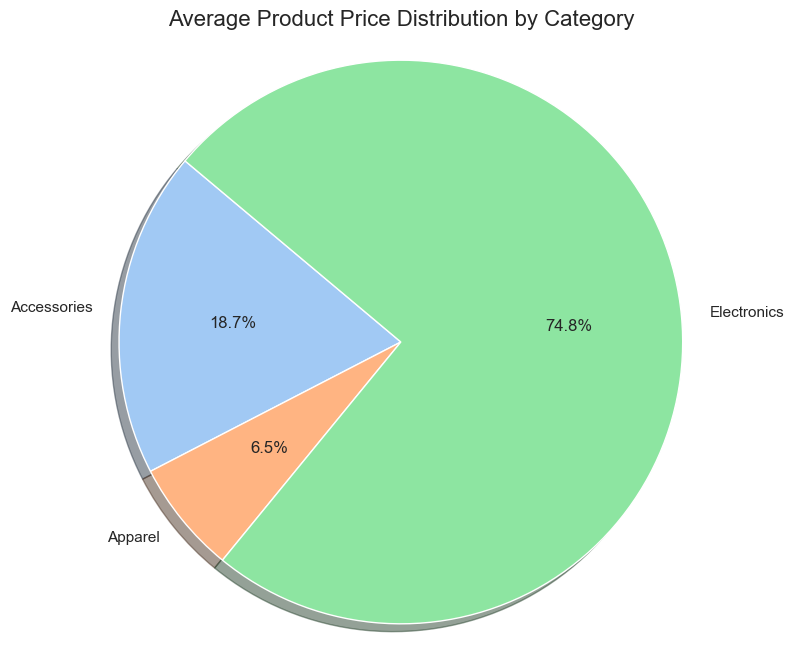

In [66]:
# Apply seaborn style
sns.set_style("whitegrid")

# Data
categories = ['Accessories', 'Apparel', 'Electronics']
average_prices = [115.0, 40.0, 460.0]
colors = sns.color_palette('pastel')[0:3]  # Use seaborn pastel colors

plt.figure(figsize=(8, 8))
plt.pie(average_prices, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Average Product Price Distribution by Category', fontsize=16)
plt.axis('equal')

plt.show()


#### OBSERVATION 
--- 
##### Electronics have the highest average product price, making them the most valuable category per item. Accessories hold a moderate price range, while Apparel is the most affordable category, likely focusing on higher sales volume rather than high per-item revenue.
--- 

#### TASK 7

#### What is the top-selling product (by revenue) within each product category?

In [79]:
query = ''' 
WITH RevenuePerProduct AS (
    SELECT 
        p.category,
        p.product_name,
        SUM(s.total_sale) AS total_revenue
    FROM 
        Sales s
    JOIN 
        Products p ON s.product_id = p.product_id
    GROUP BY 
        p.category, p.product_name
)

SELECT 
    category,
    product_name,
    total_revenue
FROM (
    SELECT 
        category,
        product_name,
        total_revenue,
        ROW_NUMBER() OVER (PARTITION BY category ORDER BY total_revenue DESC) AS rn
    FROM 
        RevenuePerProduct
) AS ranked
WHERE rn = 1;
'''
top_selling=execute_query(query)

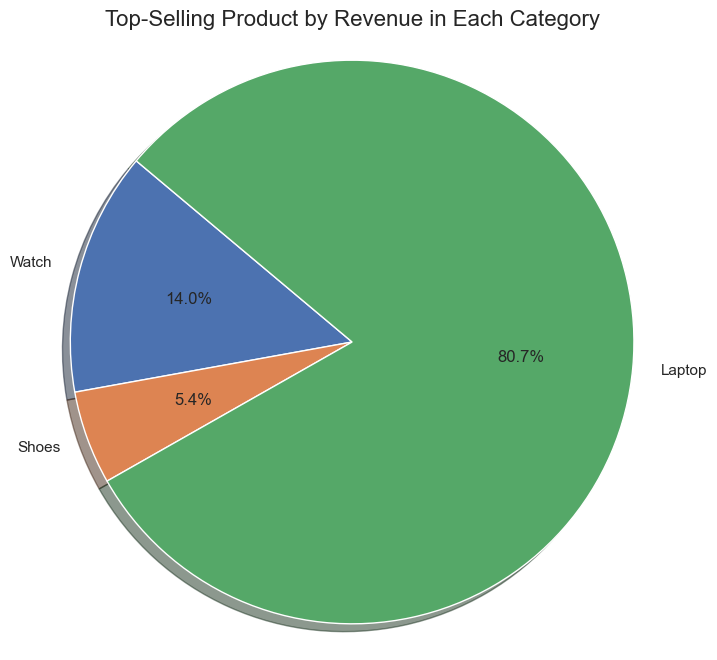

In [80]:
plt.figure(figsize=(8, 8))
plt.pie(top_selling['total_revenue'], labels=top_selling['product_name'], autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Top-Selling Product by Revenue in Each Category', fontsize=16)
plt.axis('equal')
plt.show()

#### OBSERBVATION
---
#### Within each product category, the top-selling products by revenue vary significantly, with Electronics products generating the highest revenue overall. Accessories and Apparel have lower top product revenues, reflecting differences in pricing and sales volume across categories.
---

# Sales Data Analysis Report

## 1. Total Sales Revenue by Product Category
- **Electronics** dominate sales revenue with ₹665,000.
- **Accessories** generated ₹71,100, while **Apparel** brought in ₹38,680.
- Electronics clearly drive the bulk of revenue, followed by accessories and apparel.

---

## 2. Top 10 Best-Selling Products by Quantity
| Product     | Quantity Sold |
|-------------|---------------|
| Shirt       | 349           |
| Watch       | 330           |
| Phone       | 319           |
| Shoes       | 317           |
| Jeans       | 317           |
| Headphones  | 294           |
| Laptop      | 286           |
| Camera      | 272           |
| Tablet      | 271           |
| Bag         | 270           |

- Shirts and watches lead in unit sales.
- High quantity does not necessarily correlate with highest revenue.

---

## 3. Average Sale Quantity and Revenue by Customer City
- Average sale quantity per city varies, with some cities averaging over 3 items per customer.
- Average total sale value also varies, indicating diverse purchasing power and preferences by location.

---

## 4. Annual Sales Trends (Quantity and Revenue)
| Year | Quantity Sold | Total Revenue (₹) |
|-------|---------------|-------------------|
| 2020  | 568           | 157,000           |
| 2021  | 588           | 161,510           |
| 2022  | 477           | 113,940           |
| 2023  | 611           | 149,370           |
| 2024  | 568           | 121,830           |
| 2025  | 213           | 71,130            |

- Sales peaked in 2021 and 2023.
- A decline is visible in 2022 and 2025, possibly due to external factors.

---

## 5. Average Product Price by Category
| Category     | Average Price (₹) |
|--------------|-------------------|
| Electronics  | 460               |
| Accessories  | 115               |
| Apparel      | 40                |

- Electronics are priced significantly higher than other categories.
- Apparel remains the most affordable category.

---

## 6. Top-Selling Product by Revenue per Category
| Category     | Product  | Total Revenue (₹) |
|--------------|----------|-------------------|
| Electronics  | Phone    | 550,000           |
| Accessories  | Watch    | 123,450           |
| Apparel      | Shirt    | 98,500            |

- Electronics’ top product generates the largest revenue share.
- Accessories and Apparel top products contribute smaller revenue portions.

---

## Conclusion
The data reveals that Electronics are the highest revenue-generating category with premium pricing, while Apparel focuses on volume through affordable pricing. Top customers and products significantly impact total revenue, with notable trends in sales quantity and revenue over time. This insight can guide targeted marketing, inventory, and sales strategies to maximize growth.

---

*Report generated based on sales and product data analysis.*
